# Isolation Forest, synthetic data and scores

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pyod.models.iforest import IForest

In [2]:
palette = "blend:#009f06,white"

In [3]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

In [4]:
DPI=300

In [5]:
np.random.seed(42)

In [6]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]
offset = 3

In [7]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [8]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [9]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [10]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})])

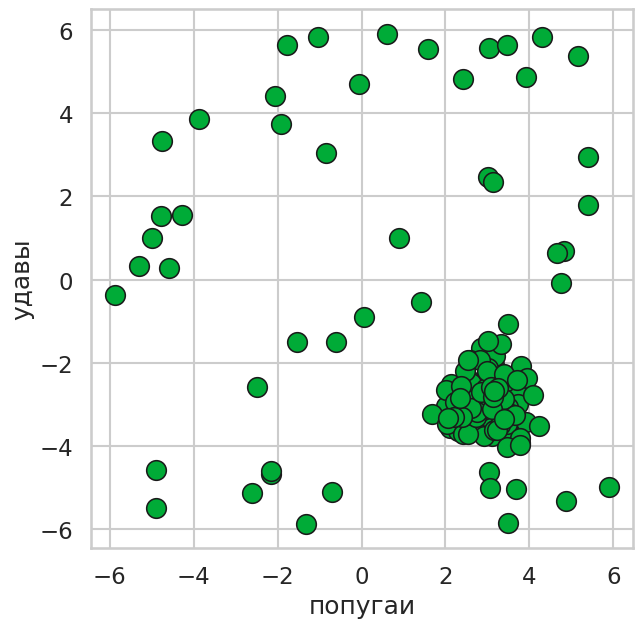

In [11]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', color='#00ab37', s=200, edgecolor='k')
plt.savefig("images/synthetic_data.png", transparent=True, dpi=DPI)

In [12]:
clf = IForest()

In [13]:
clf.fit(data)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [14]:
scores = pd.Series(clf.decision_scores_, name='индекс аномальности')

In [15]:
data.head(10)

,попугаи,удавы
0,3.248357,-2.874754
1,2.930868,-2.826776
2,3.323844,-3.340012
3,3.761515,-2.883873
4,2.882923,-2.853464
5,2.882932,-3.357176
6,3.789606,-2.067113
7,3.383717,-2.763084
8,2.765263,-3.595652
9,3.271280,-2.671723


In [16]:
scores.head(10)

0   -0.252644
1   -0.264768
2   -0.242163
3   -0.198965
4   -0.262466
5   -0.253549
6   -0.145664
7   -0.246217
8   -0.234501
9   -0.250980
Name: индекс аномальности, dtype: float64

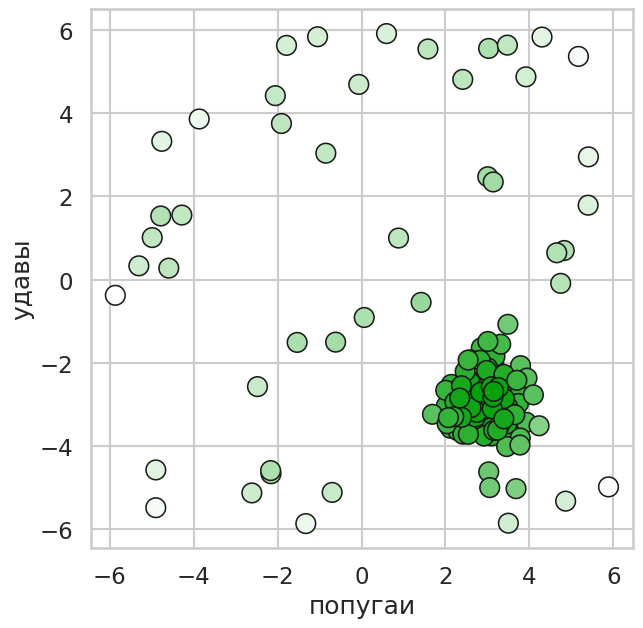

In [17]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor='k', 
                palette=palette, hue=scores.values, legend=False)
plt.savefig("images/synthetic_data_scores.png", transparent=True, dpi=DPI)

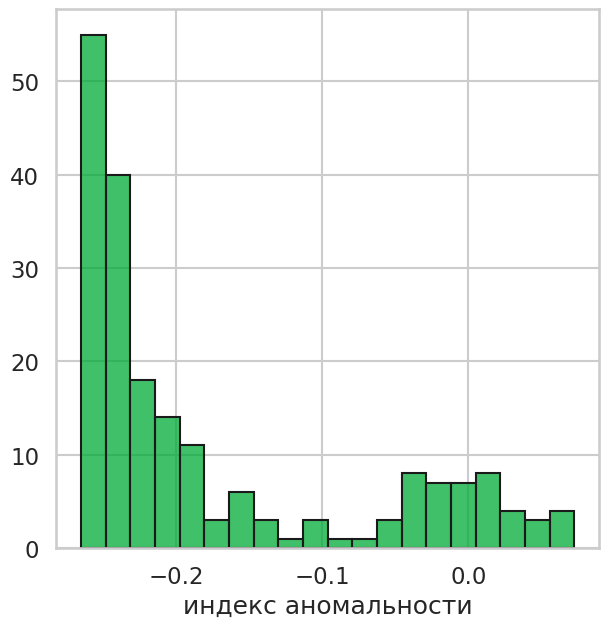

In [18]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(scores, color='#00ab37', edgecolor='k', bins=20)
ax.set(ylabel='')
plt.savefig("images/anomaly_score_histogram.png", transparent=True, dpi=DPI)